# Problem: Detecting fraudulent app usage data with STL and confidence intervals
You are given app usage data, tracking the daily active users. You want to determine anomlies that are indicative of any suspicious activity, such as bots.

We will use Seasonal Trend Decomposition (STL)  decomposition and combine it with statistical methods to detect anomalies in time-series data.  




This code imports essential Python libraries for data analysis, visualization, and time series decomposition:

STL from statsmodels.tsa.seasonal is used for for Seasonal-Trend decomposition of time series data.








In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
from statsmodels.tsa.seasonal import STL

In the next cell, load the dataset from the file and display its contents to examine the data structure.


In [ ]:
# Your code to read the data using pandas. Assign the data to a variable named 'df'
# Your code to Print few rows of the dataset to see how it looks.
df = pd.read_csv('product_usage_data.csv')

In [ ]:
print(df.head)

<bound method NDFrame.head of     timestamp  daily_active_users
0    1/1/2024                1107
1    1/2/2024                1113
2    1/3/2024                1143
3    1/4/2024                1140
4    1/5/2024                1136
..        ...                 ...
86  3/27/2024                1135
87  3/28/2024                1130
88  3/29/2024                1108
89  3/30/2024                1113
90  3/31/2024                1103

[91 rows x 2 columns]>


Following code converts the 'timestamp' column in the DataFrame df to a datetime format using pandas.to_datetime(), ensuring that the values are recognized as datetime objects for easier time-based operations and analysis


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])


Use the following code to display the first few rows of the updated DataFrame and verify the modifications:


In [ ]:
# Your code to  see the updated data. Print first few rows.
print(df.head(5))

   timestamp  daily_active_users
0 2024-01-01                1107
1 2024-01-02                1113
2 2024-01-03                1143
3 2024-01-04                1140
4 2024-01-05                1136


Following  code creates a pandas Series named dau using the values from the 'daily_active_users' column of the DataFrame df, setting the 'timestamp' column as the index to enable time series operations.


In [ ]:
dau = pd.Series(data=df['daily_active_users'].values, index=df['timestamp'])


In the next cell, plot the dau data using the Matplotlib library. Ensure that the plot includes appropriate labels for the x-axis and y-axis, as well as a suitable title.



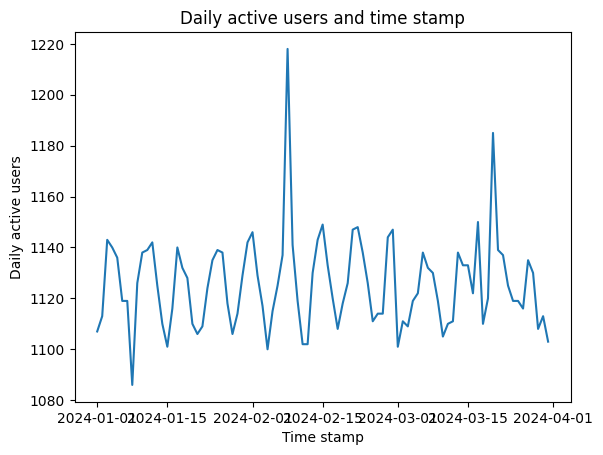

In [ ]:
#
#
#
# Your code to Plot the data 'dau' using matplot library. Give suitable names to the x label, y label and title
#
#
plt.title('Daily active users and time stamp')
plt.xlabel('Time stamp')
plt.ylabel('Daily active users')
plt.plot(dau)
plt.show()

The code dau.describe() is calling the .describe() method on a DataFrame named dau.



In [ ]:
dau.describe()


,0
count,91.000000
mean,1125.703297
std,18.362700
min,1086.000000
25%,1113.000000
50%,1125.000000
75%,1138.000000
max,1218.000000


Folloiwng code decomposes the time series data dau into trend, seasonal, and residual components using the STL method, specifying weekly seasonality (period=7), and stores the results in res.


In [ ]:
stl = STL(dau, period=7)  # weekly seasonality
res = stl.fit()



In the following cell, print the different time series components.

In [ ]:
print(res.seasonal)
print(res.trend)
print(res.resid)
# Your code to print trend component
# Your code to print residual component. res.resid is the residual component
print (res.resid)

timestamp
2024-01-01   -29.112699
2024-01-02    -9.007788
2024-01-03    16.681902
2024-01-04    10.810216
2024-01-05    13.981569
                ...    
2024-03-27    26.987993
2024-03-28     6.704833
2024-03-29    -0.830159
2024-03-30    -1.994414
2024-03-31    -2.578938
Name: season, Length: 91, dtype: float64
timestamp
2024-01-01    1128.320578
2024-01-02    1127.468131
2024-01-03    1126.682798
2024-01-04    1125.964042
2024-01-05    1125.315609
                 ...     
2024-03-27    1119.600989
2024-03-28    1116.557829
2024-03-29    1113.511075
2024-03-30    1110.462253
2024-03-31    1107.416218
Name: trend, Length: 91, dtype: float64
timestamp
2024-01-01     7.792122
2024-01-02    -5.460343
2024-01-03    -0.364701
2024-01-04     3.225742
2024-01-05    -3.297178
                ...    
2024-03-27   -11.588982
2024-03-28     6.737338
2024-03-29    -4.680917
2024-03-30     4.532161
2024-03-31    -1.837280
Name: resid, Length: 91, dtype: float64
timestamp
2024-01-01     7.792122
2

Following code, creates the plot of various time series components like, trend, seasonality, and residual.

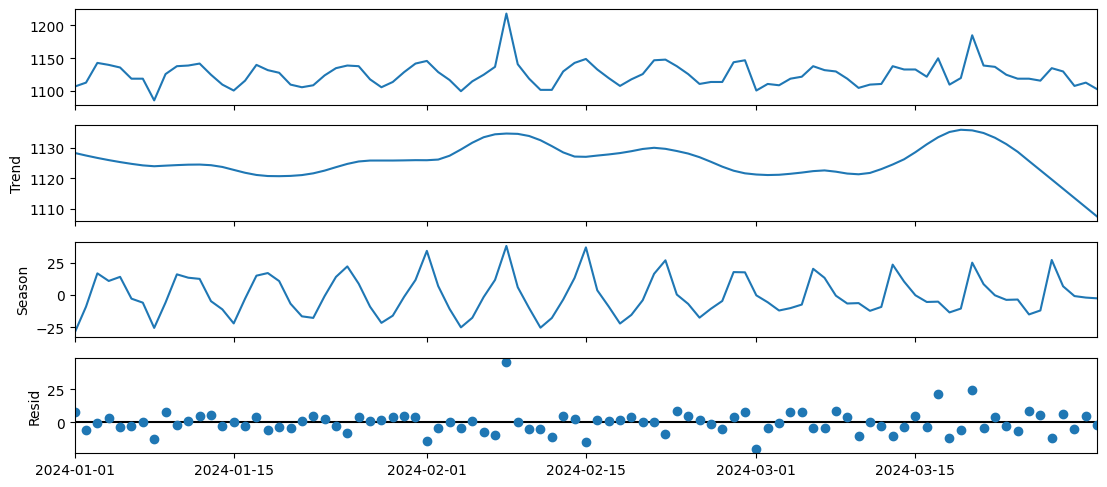

In [ ]:
#plot 4 components, original, residual, trend, and noise using matplotlib

fig = res.plot()
fig.set_size_inches(12, 5)
plt.show()

Following code is used for minor anomaly detection by defining an upper and lower threshold around the trend component of the time series. These thresholds, trend_iv_l_minor and trend_iv_u_minor, are set by adjusting the trend with the mean and standard deviation of the residuals. Values outside this range can be considered anomalies, as they deviate significantly from the expected trend behavior.

In [ ]:
trend_iv_l_minor = pd.Series(data=res.trend.values-np.mean(res.trend)-np.std(res.resid), index=res.trend.index)
trend_iv_u_minor = pd.Series(data=res.trend.values-np.mean(res.trend)+np.std(res.resid), index=res.trend.index)\

minor_anom = np.where((res.resid < trend_iv_l_minor) | (res.resid > trend_iv_u_minor), res.resid, np.nan)


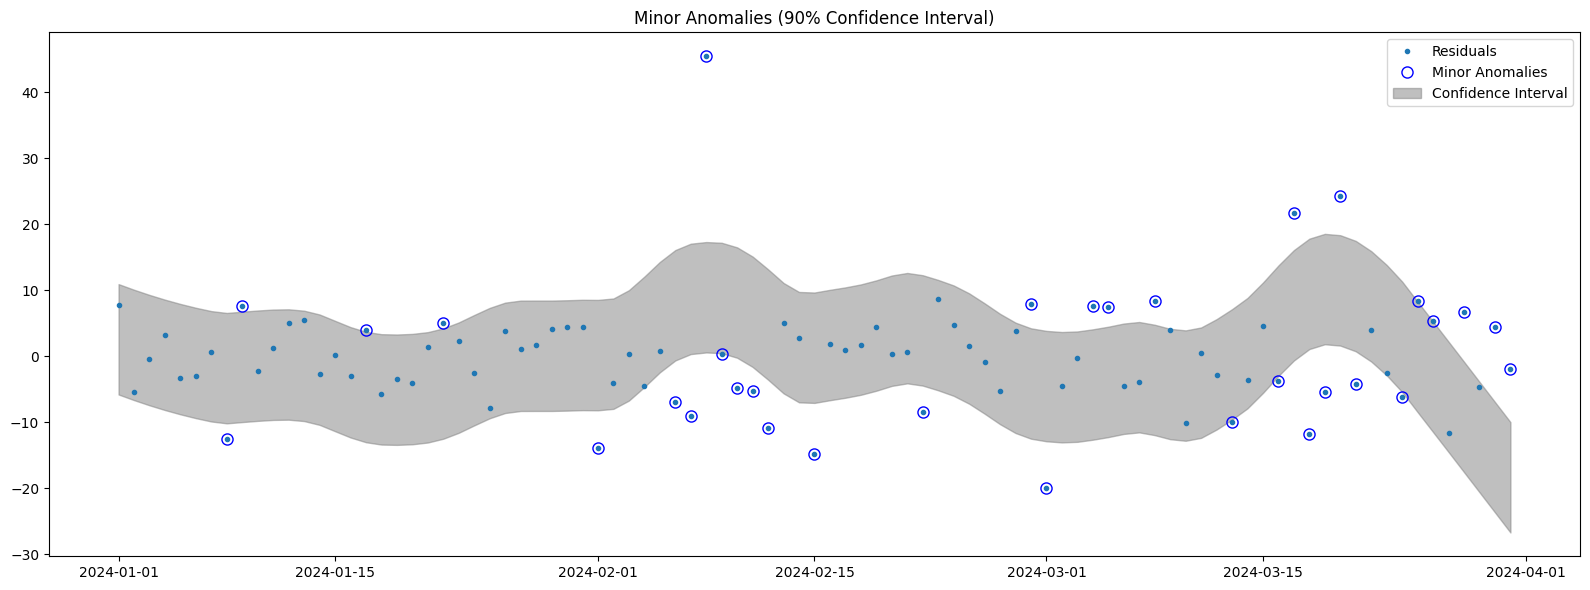

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Create a single figure with one axis (ax)
fig, ax = plt.subplots(figsize=(16, 6))
# Plot the residuals
ax.plot(res.resid, marker='.', linestyle='none', label='Residuals')
# Plot the minor anomalies (blue circles)
ax.plot(pd.Series(minor_anom, res.resid.index), marker='o', linestyle='none', label='Minor Anomalies', color='blue', fillstyle='none', markersize=8)
# Fill the confidence interval (grey shaded area)
ax.fill_between(res.resid.index, trend_iv_l_minor, trend_iv_u_minor, color='grey', alpha=0.5, label='Confidence Interval')
# Set the title and labels
ax.set_title('Minor Anomalies (90% Confidence Interval)')
# Add a legend
ax.legend()
# Display the plot
plt.tight_layout()
plt.show()



Bsed on the above code, write Python code to find anomalies that are 2 times and 3 times away from standard deviation. Use trend component for detecting anomalies.

In [ ]:
#
#
# Your code to find the anomalies that are 2 standard deviations away from the residuals
#
trend_iv_l_major = pd.Series(data=res.trend.values - np.mean(res.trend) - 2 * np.std(res.resid), index=res.trend.index)
trend_iv_u_major = pd.Series(data=res.trend.values - np.mean(res.trend) + 2 * np.std(res.resid), index=res.trend.index)

major_anom = np.where((res.resid < trend_iv_l_major) | (res.resid > trend_iv_u_major), res.resid, np.nan)


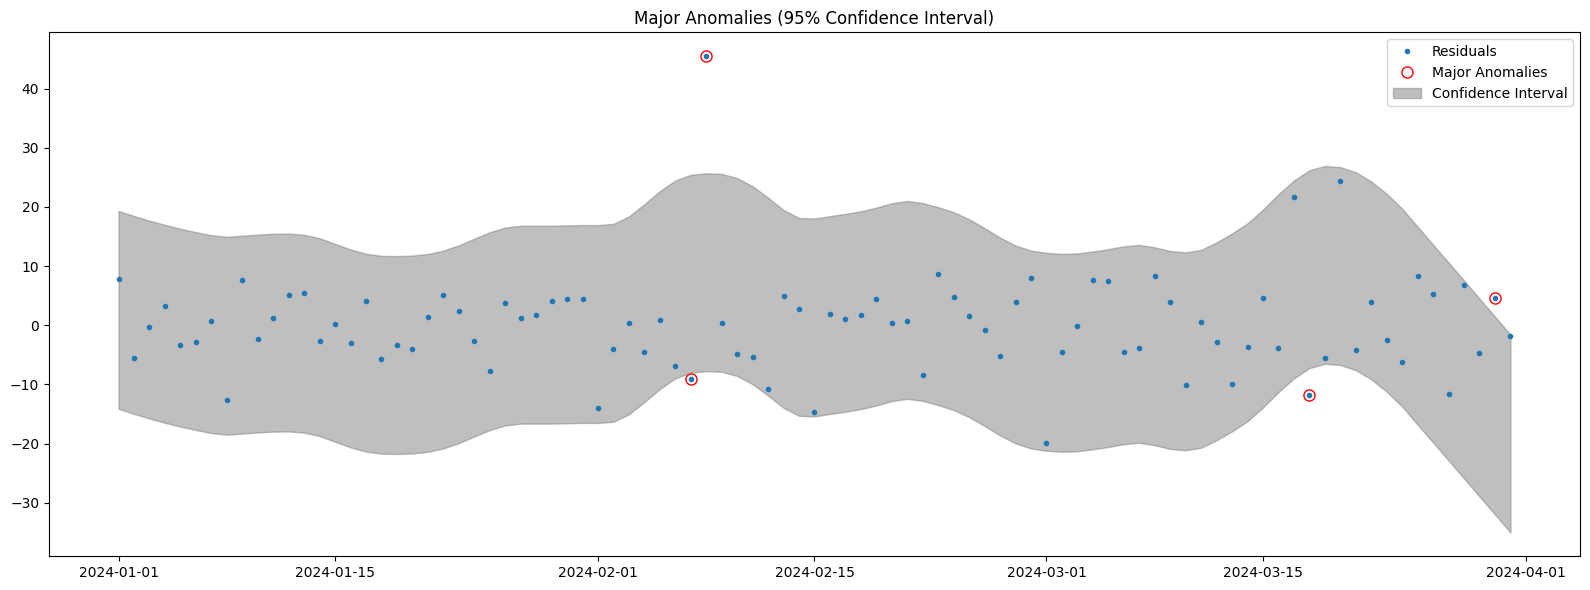

In [ ]:
#
#
# Your code to plot the anomalies and the residuals.
#
#
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax.plot(pd.Series(major_anom, res.resid.index), marker='o', linestyle='none', label='Major Anomalies', color='red', fillstyle='none', markersize=8)
ax.fill_between(res.resid.index, trend_iv_l_major, trend_iv_u_major, color='grey', alpha=0.5, label='Confidence Interval')
ax.set_title('Major Anomalies (95% Confidence Interval)')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
#
#
# Your code to find the anomalies that are 3 standard deviations away from the residuals
#
#
trend_iv_l_critical = pd.Series(data=res.trend.values - np.mean(res.trend) - 3 * np.std(res.resid), index=res.trend.index)
trend_iv_u_critical = pd.Series(data=res.trend.values - np.mean(res.trend) + 3 * np.std(res.resid), index=res.trend.index)
critical_anom = np.where((res.resid < trend_iv_l_critical) | (res.resid > trend_iv_u_critical), res.resid, np.nan)


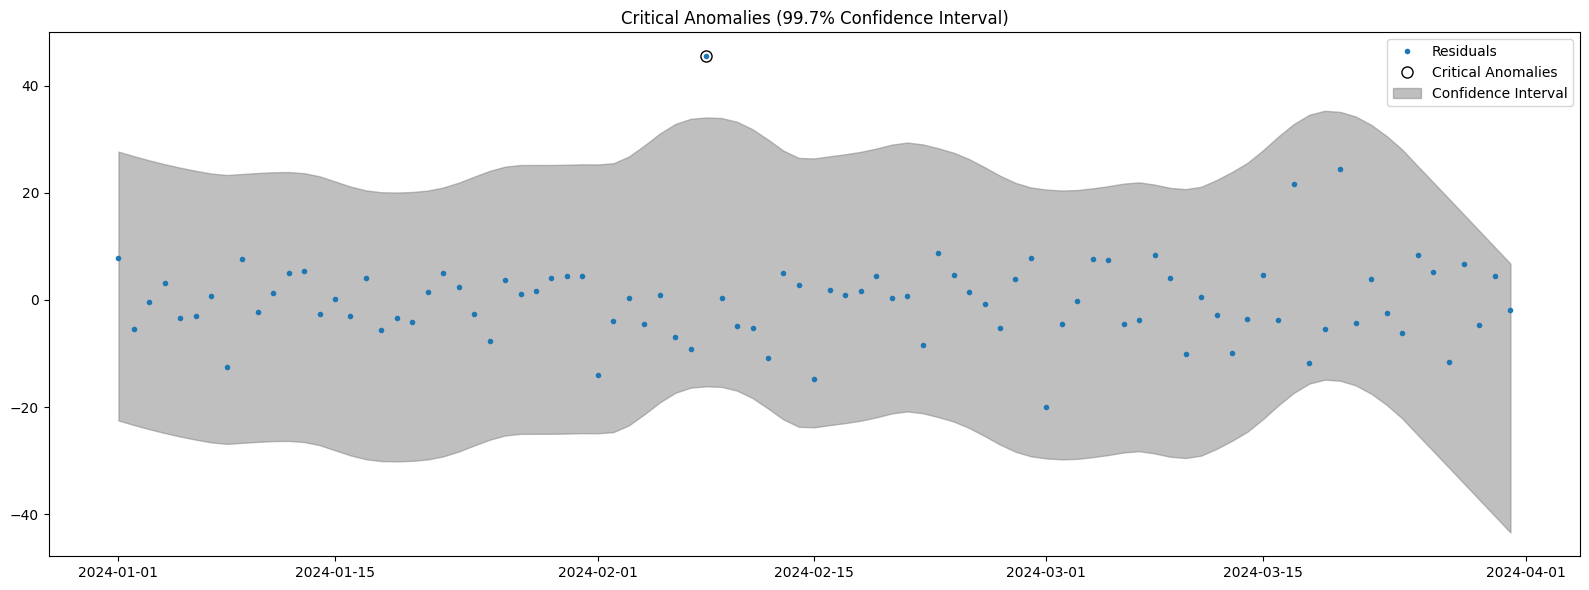

In [ ]:
#
#
# Your code to plot the anomalies and the residuals.
#
#
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(res.resid, marker='.', linestyle='none', label='Residuals')
ax.plot(pd.Series(critical_anom, res.resid.index), marker='o', linestyle='none', label='Critical Anomalies', color='black', fillstyle='none', markersize=8)
ax.fill_between(res.resid.index, trend_iv_l_critical, trend_iv_u_critical, color='grey', alpha=0.5, label='Confidence Interval')
ax.set_title('Critical Anomalies (99.7% Confidence Interval)')
ax.legend()
plt.tight_layout()
plt.show()

Using a similar approach, write Python code to detect anomalies using the Z-score method. Apply 2-3 threshold values to detect anomalies, using the residual component for detection. Note that the formula for the Z-score is:
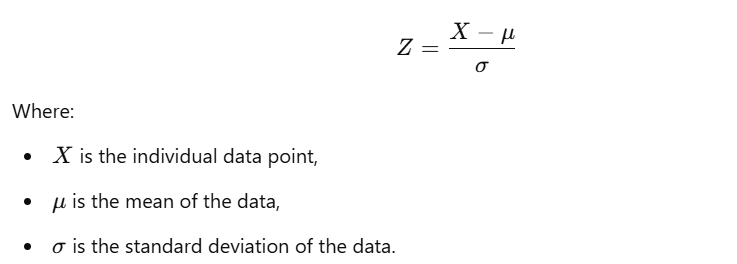

A point x is anomaly if Z-score for that point is greater than threshold.


In [ ]:

#
# Your code to detect the anomalies using Z-score method. Use 2-3 different threshold.
#
residuals_zscore = (res.resid - np.mean(res.resid)) / np.std(res.resid)
threshold_1 = 2  # 2 standard deviations
threshold_2 = 3  # 3 standard deviations
anomalies_threshold_1 = np.where(np.abs(residuals_zscore) >= threshold_1, res.resid, np.nan)
anomalies_threshold_2 = np.where(np.abs(residuals_zscore) > threshold_2, res.resid, np.nan)

print('#######################')

print(anomalies_threshold_1)


#
# Your code to detect the anomalies using Z-score method. Use 2-3 different threshold.
#
residuals_zscore = (res.resid - np.mean(res.resid)) / np.std(res.resid)
threshold_1 = 2  # 2 standard deviations
threshold_2 = 3  # 3 standard deviations
anomalies_threshold_1 = np.where(np.abs(residuals_zscore) > threshold_1, res.resid, np.nan)
anomalies_threshold_2 = np.where(np.abs(residuals_zscore) > threshold_2, res.resid, np.nan)

#######################
[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan  45.49722786          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
 -19.94470923          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan

#Important: Lab Logbook Requirement:
#Plot the anomalies in next cell and include this graph in your lab logbook."

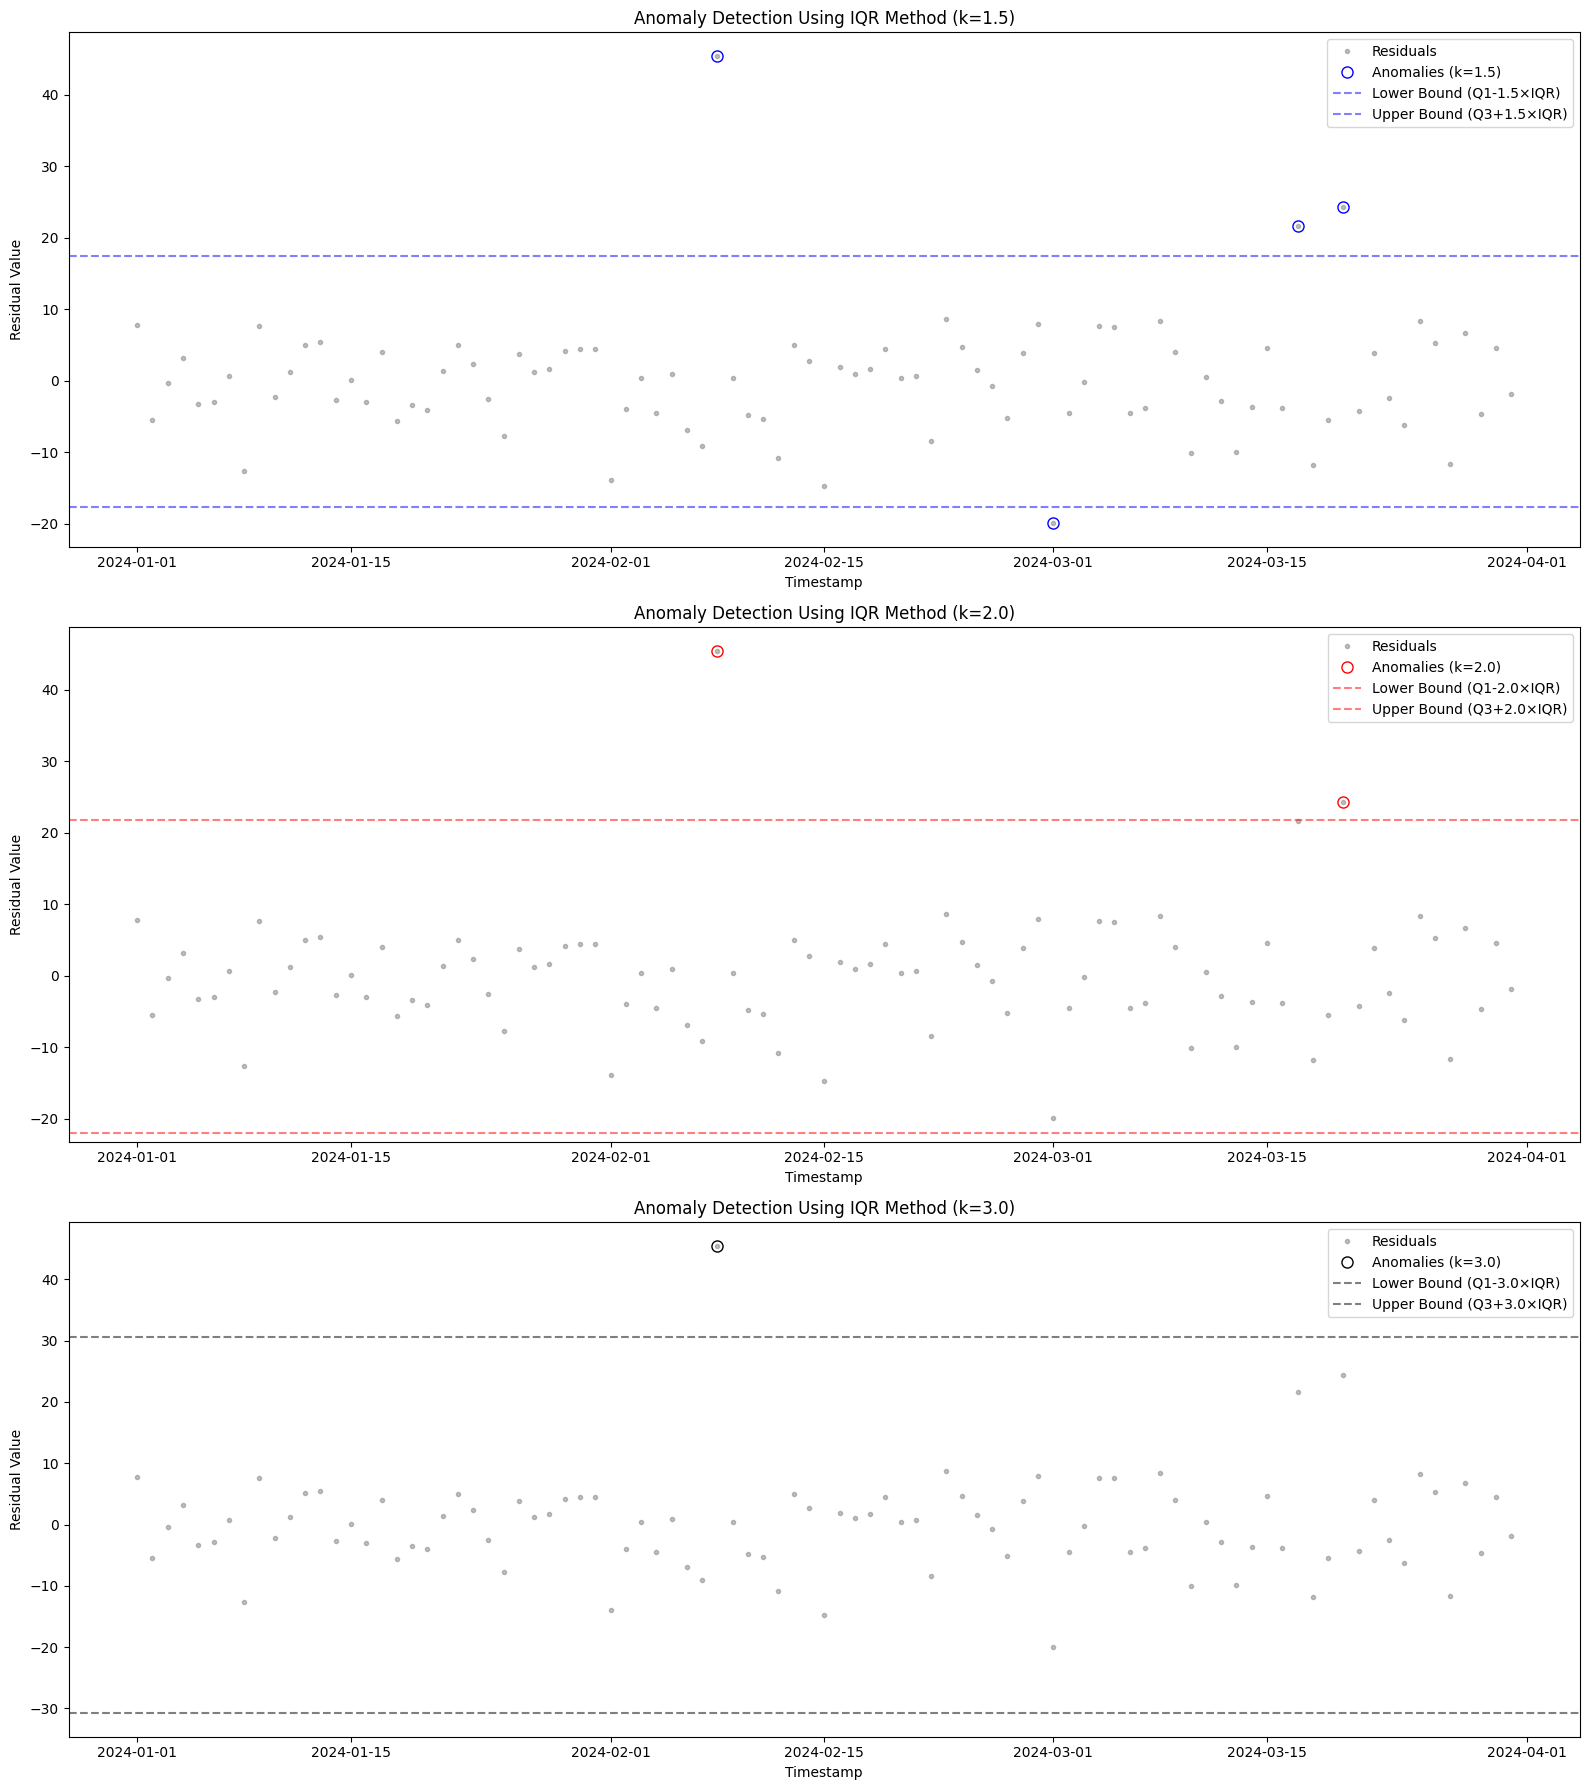

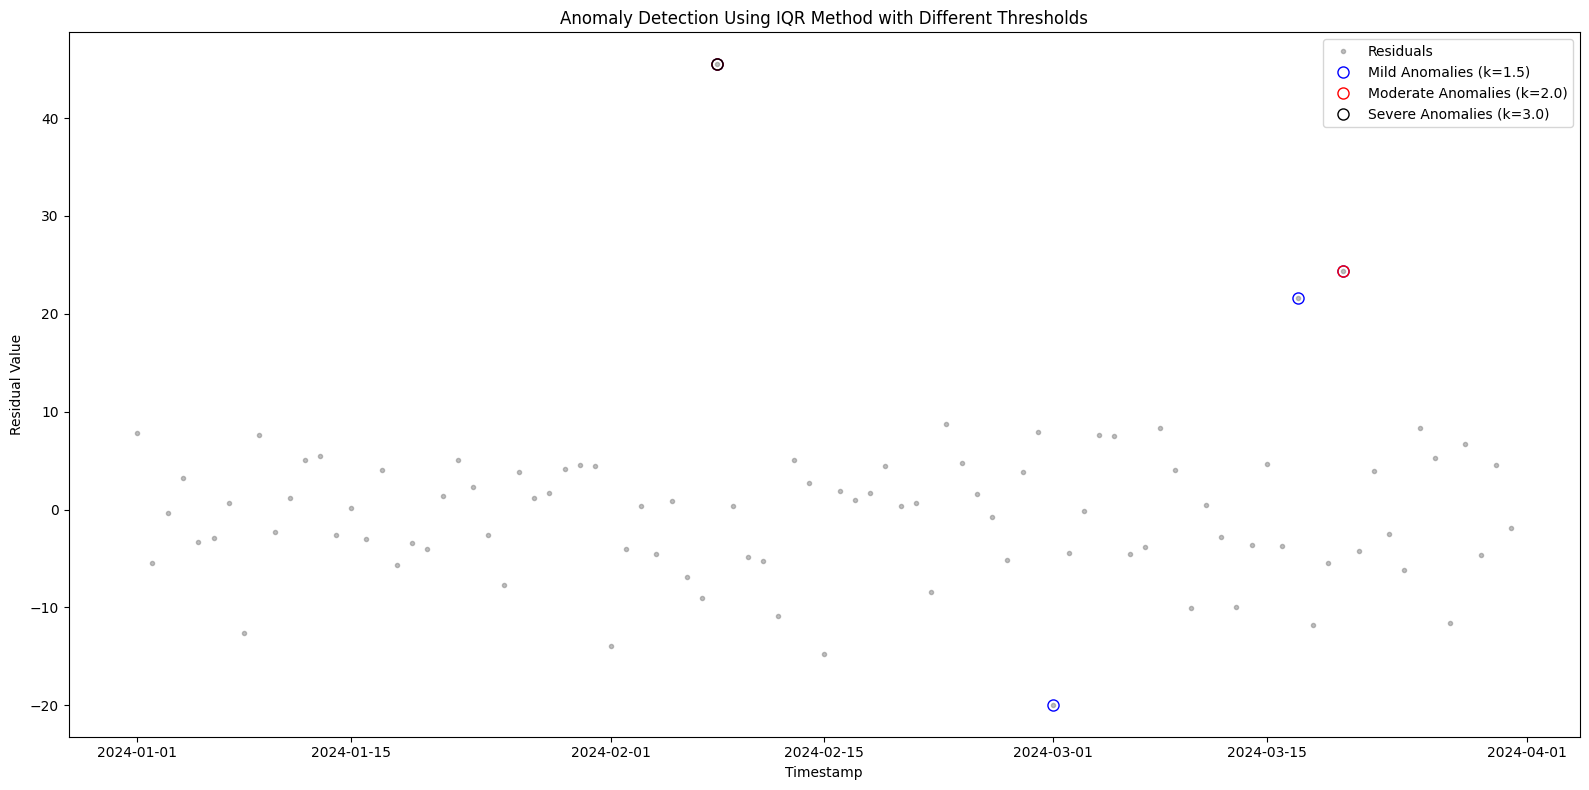

In [24]:
#
# Your code to plot the anomalies for three different types of threshold.
#
# Plot anomalies detected using IQR method with different k values
k_values = [1.5, 2.0, 3.0]  # Common k values for IQR method
colors = ['blue', 'red', 'black']
labels = ['Mild Anomalies (k=1.5)', 'Moderate Anomalies (k=2.0)', 'Severe Anomalies (k=3.0)']

# Create a single figure with subplots for each threshold
plt.figure(figsize=(16, 18))

for i, k in enumerate(k_values):
    # Calculate quartiles and IQR for this subplot
    Q1 = np.nanpercentile(res.resid, 25)
    Q3 = np.nanpercentile(res.resid, 75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Identify anomalies
    anomalies = np.where((res.resid < lower_bound) | (res.resid > upper_bound), res.resid, np.nan)

    # Create subplot for this threshold
    plt.subplot(3, 1, i+1)

    # Plot residuals
    plt.plot(res.resid, marker='.', linestyle='none', color='gray', alpha=0.5, label='Residuals')

    # Plot anomalies for this threshold
    plt.plot(pd.Series(anomalies, res.resid.index),
             marker='o', linestyle='none', label=f'Anomalies (k={k})',
             color=colors[i], fillstyle='none', markersize=8)

    # Add horizontal lines for bounds
    plt.axhline(y=lower_bound, color=colors[i], linestyle='--', alpha=0.5,
                label=f'Lower Bound (Q1-{k}×IQR)')
    plt.axhline(y=upper_bound, color=colors[i], linestyle='--', alpha=0.5,
                label=f'Upper Bound (Q3+{k}×IQR)')

    # Add title and labels
    plt.title(f'Anomaly Detection Using IQR Method (k={k})')
    plt.xlabel('Timestamp')
    plt.ylabel('Residual Value')
    plt.legend()

plt.tight_layout()
plt.show()

# Alternative visualization: all thresholds on a single plot
plt.figure(figsize=(16, 8))

# Plot residuals
plt.plot(res.resid, marker='.', linestyle='none', color='gray', alpha=0.5, label='Residuals')

# Plot anomalies for each threshold
for i, k in enumerate(k_values):
    # Calculate quartiles and IQR
    Q1 = np.nanpercentile(res.resid, 25)
    Q3 = np.nanpercentile(res.resid, 75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Identify anomalies
    anomalies = np.where((res.resid < lower_bound) | (res.resid > upper_bound), res.resid, np.nan)

    # Plot anomalies for this threshold
    plt.plot(pd.Series(anomalies, res.resid.index),
             marker='o', linestyle='none', label=labels[i],
             color=colors[i], fillstyle='none', markersize=8)

plt.title('Anomaly Detection Using IQR Method with Different Thresholds')
plt.xlabel('Timestamp')
plt.ylabel('Residual Value')
plt.legend()
plt.tight_layout()
plt.show()

Using a similar approach, write Python code to detect anomalies using the IQR method. Apply 2-3 threshold values to detect anomalies, using the residual component for detection. Note that the formula for the IQR is:

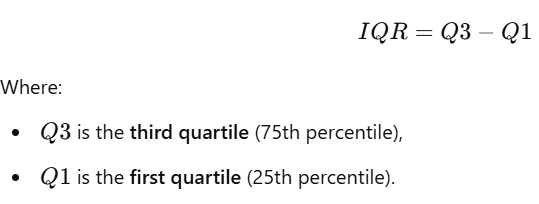

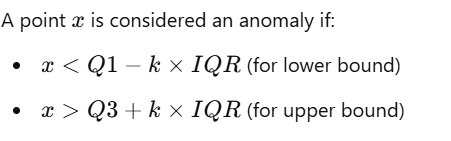

In [25]:
#
#
# Your code to detect the anomalies using IQR method. Use 2-3 different threshold.
#
#
# Function to detect anomalies using IQR method
def detect_anomalies_iqr(data, k):
    """
    Detect anomalies in time series data using the Interquartile Range method.

    Parameters:
    data (Series or array-like): Time series data for anomaly detection
    k (float): Threshold multiplier for IQR

    Returns:
    tuple: (anomalies, lower_bound, upper_bound)
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = np.nanpercentile(data, 25)
    Q3 = np.nanpercentile(data, 75)

    # Calculate IQR (Interquartile Range)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for anomaly detection
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Identify anomalies (values outside the bounds)
    anomalies = np.where((data < lower_bound) | (data > upper_bound), data, np.nan)

    return anomalies, lower_bound, upper_bound

# Apply IQR method with different threshold values to the residuals
k_values = [1.5, 2.0, 3.0]  # Common threshold values for IQR method

# Dictionaries to store the results
iqr_anomalies = {}
iqr_bounds = {}
anomaly_counts = {}

# Detect anomalies for each threshold
for k in k_values:
    # Detect anomalies
    anomalies, lower, upper = detect_anomalies_iqr(res.resid, k)

    # Store results
    iqr_anomalies[k] = anomalies
    iqr_bounds[k] = {'lower': lower, 'upper': upper}

    # Count anomalies
    anomaly_counts[k] = np.sum(~np.isnan(anomalies))

    # Print summary
    print(f"IQR Method with k={k}:")
    print(f"  Lower bound: {lower:.4f}")
    print(f"  Upper bound: {upper:.4f}")
    print(f"  Anomalies detected: {anomaly_counts[k]}")
    print()

# Find dates of anomalies for each threshold
anomaly_dates = {}
for k in k_values:
    # Create a Series with timestamps as index
    anomaly_series = pd.Series(iqr_anomalies[k], index=res.resid.index)

    # Get dates where anomalies were detected (non-NaN values)
    anomaly_dates[k] = anomaly_series.dropna().index

    # Print a few example dates with anomalies
    if len(anomaly_dates[k]) > 0:
        print(f"Example anomaly dates (k={k}):")
        print(anomaly_dates[k][:min(5, len(anomaly_dates[k]))])
        print()

# Create a DataFrame to store all anomalies for comparison
anomaly_df = pd.DataFrame(index=res.resid.index)
anomaly_df['original'] = dau
anomaly_df['residuals'] = res.resid

# Add columns for each threshold
for k in k_values:
    anomaly_df[f'anomaly_k_{k}'] = pd.Series(iqr_anomalies[k], index=res.resid.index)

# Show head of the DataFrame
print("Head of anomaly detection results DataFrame:")
print(anomaly_df.head())


IQR Method with k=1.5:
  Lower bound: -17.6371
  Upper bound: 17.4514
  Anomalies detected: 4

IQR Method with k=2.0:
  Lower bound: -22.0232
  Upper bound: 21.8375
  Anomalies detected: 2

IQR Method with k=3.0:
  Lower bound: -30.7953
  Upper bound: 30.6096
  Anomalies detected: 1

Example anomaly dates (k=1.5):
DatetimeIndex(['2024-02-08', '2024-03-01', '2024-03-17', '2024-03-20'], dtype='datetime64[ns]', name='timestamp', freq=None)

Example anomaly dates (k=2.0):
DatetimeIndex(['2024-02-08', '2024-03-20'], dtype='datetime64[ns]', name='timestamp', freq=None)

Example anomaly dates (k=3.0):
DatetimeIndex(['2024-02-08'], dtype='datetime64[ns]', name='timestamp', freq=None)

Head of anomaly detection results DataFrame:
            original  residuals  anomaly_k_1.5  anomaly_k_2.0  anomaly_k_3.0
timestamp                                                                   
2024-01-01      1107   7.792122            NaN            NaN            NaN
2024-01-02      1113  -5.460343       

#Important: Lab Logbook Requirement:
#Plot the anomalies in next cell and include this graph in your lab logbook."

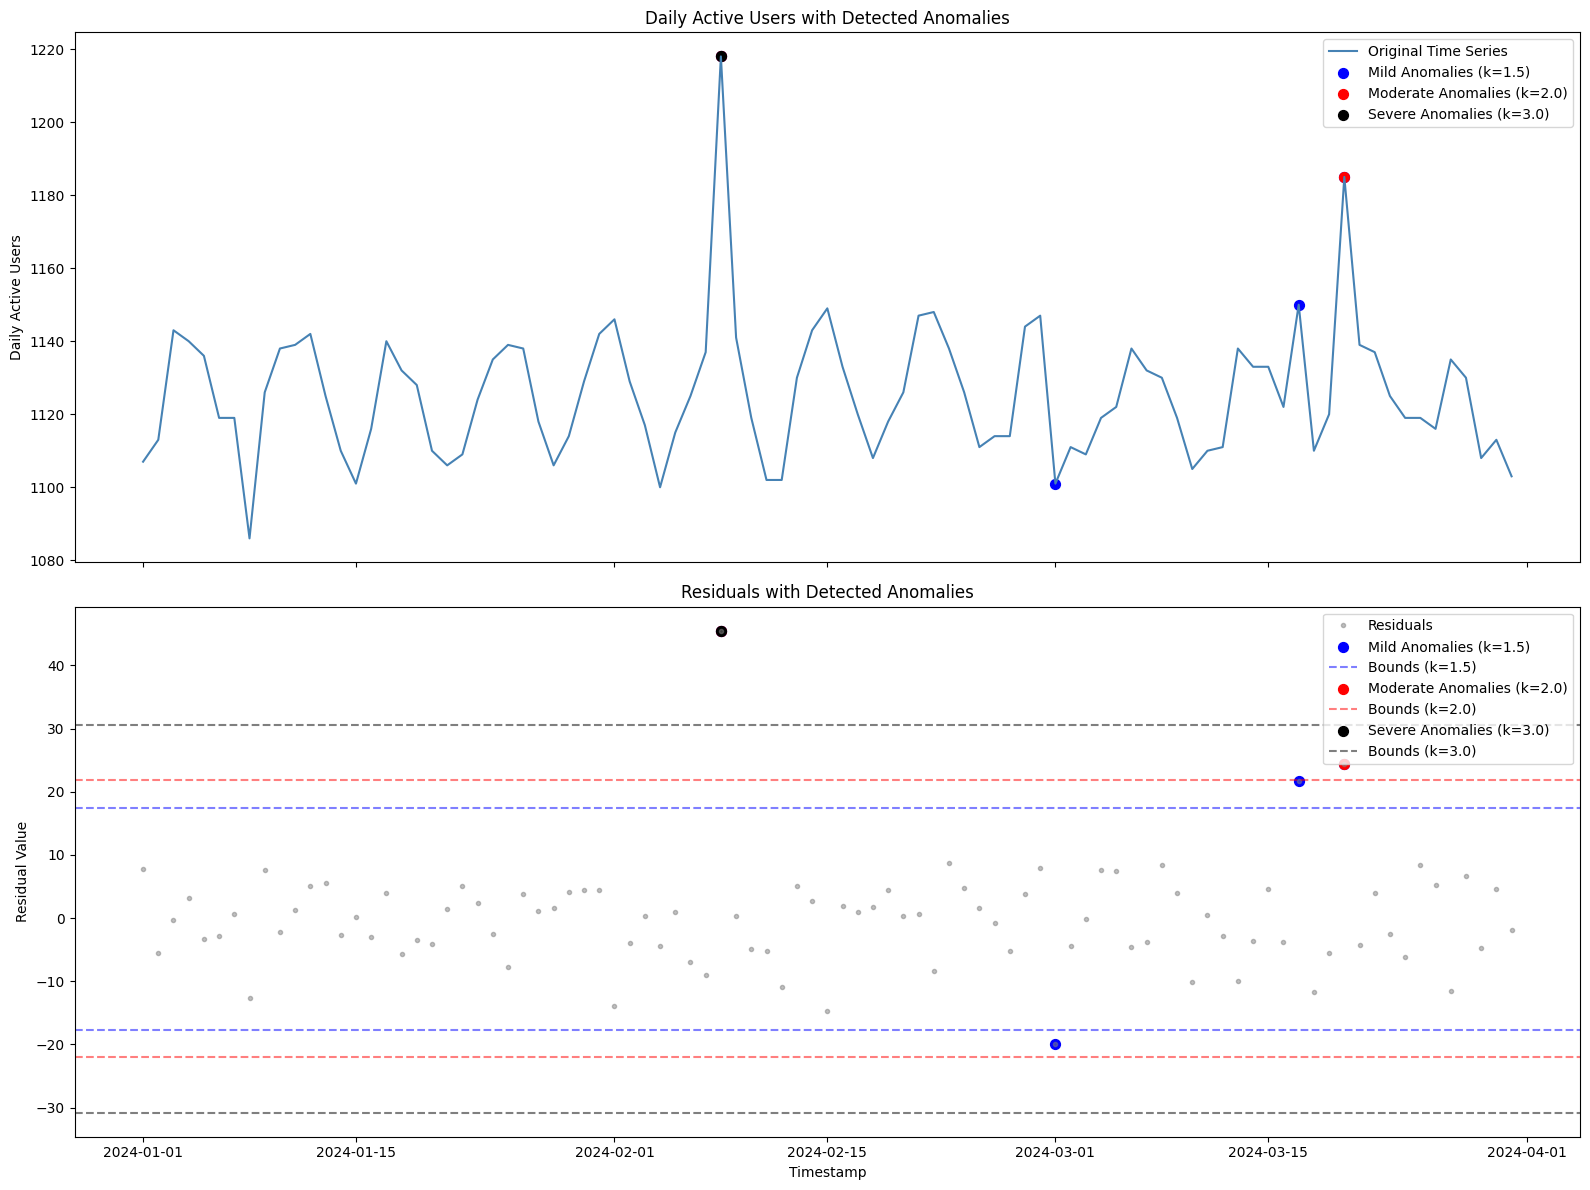

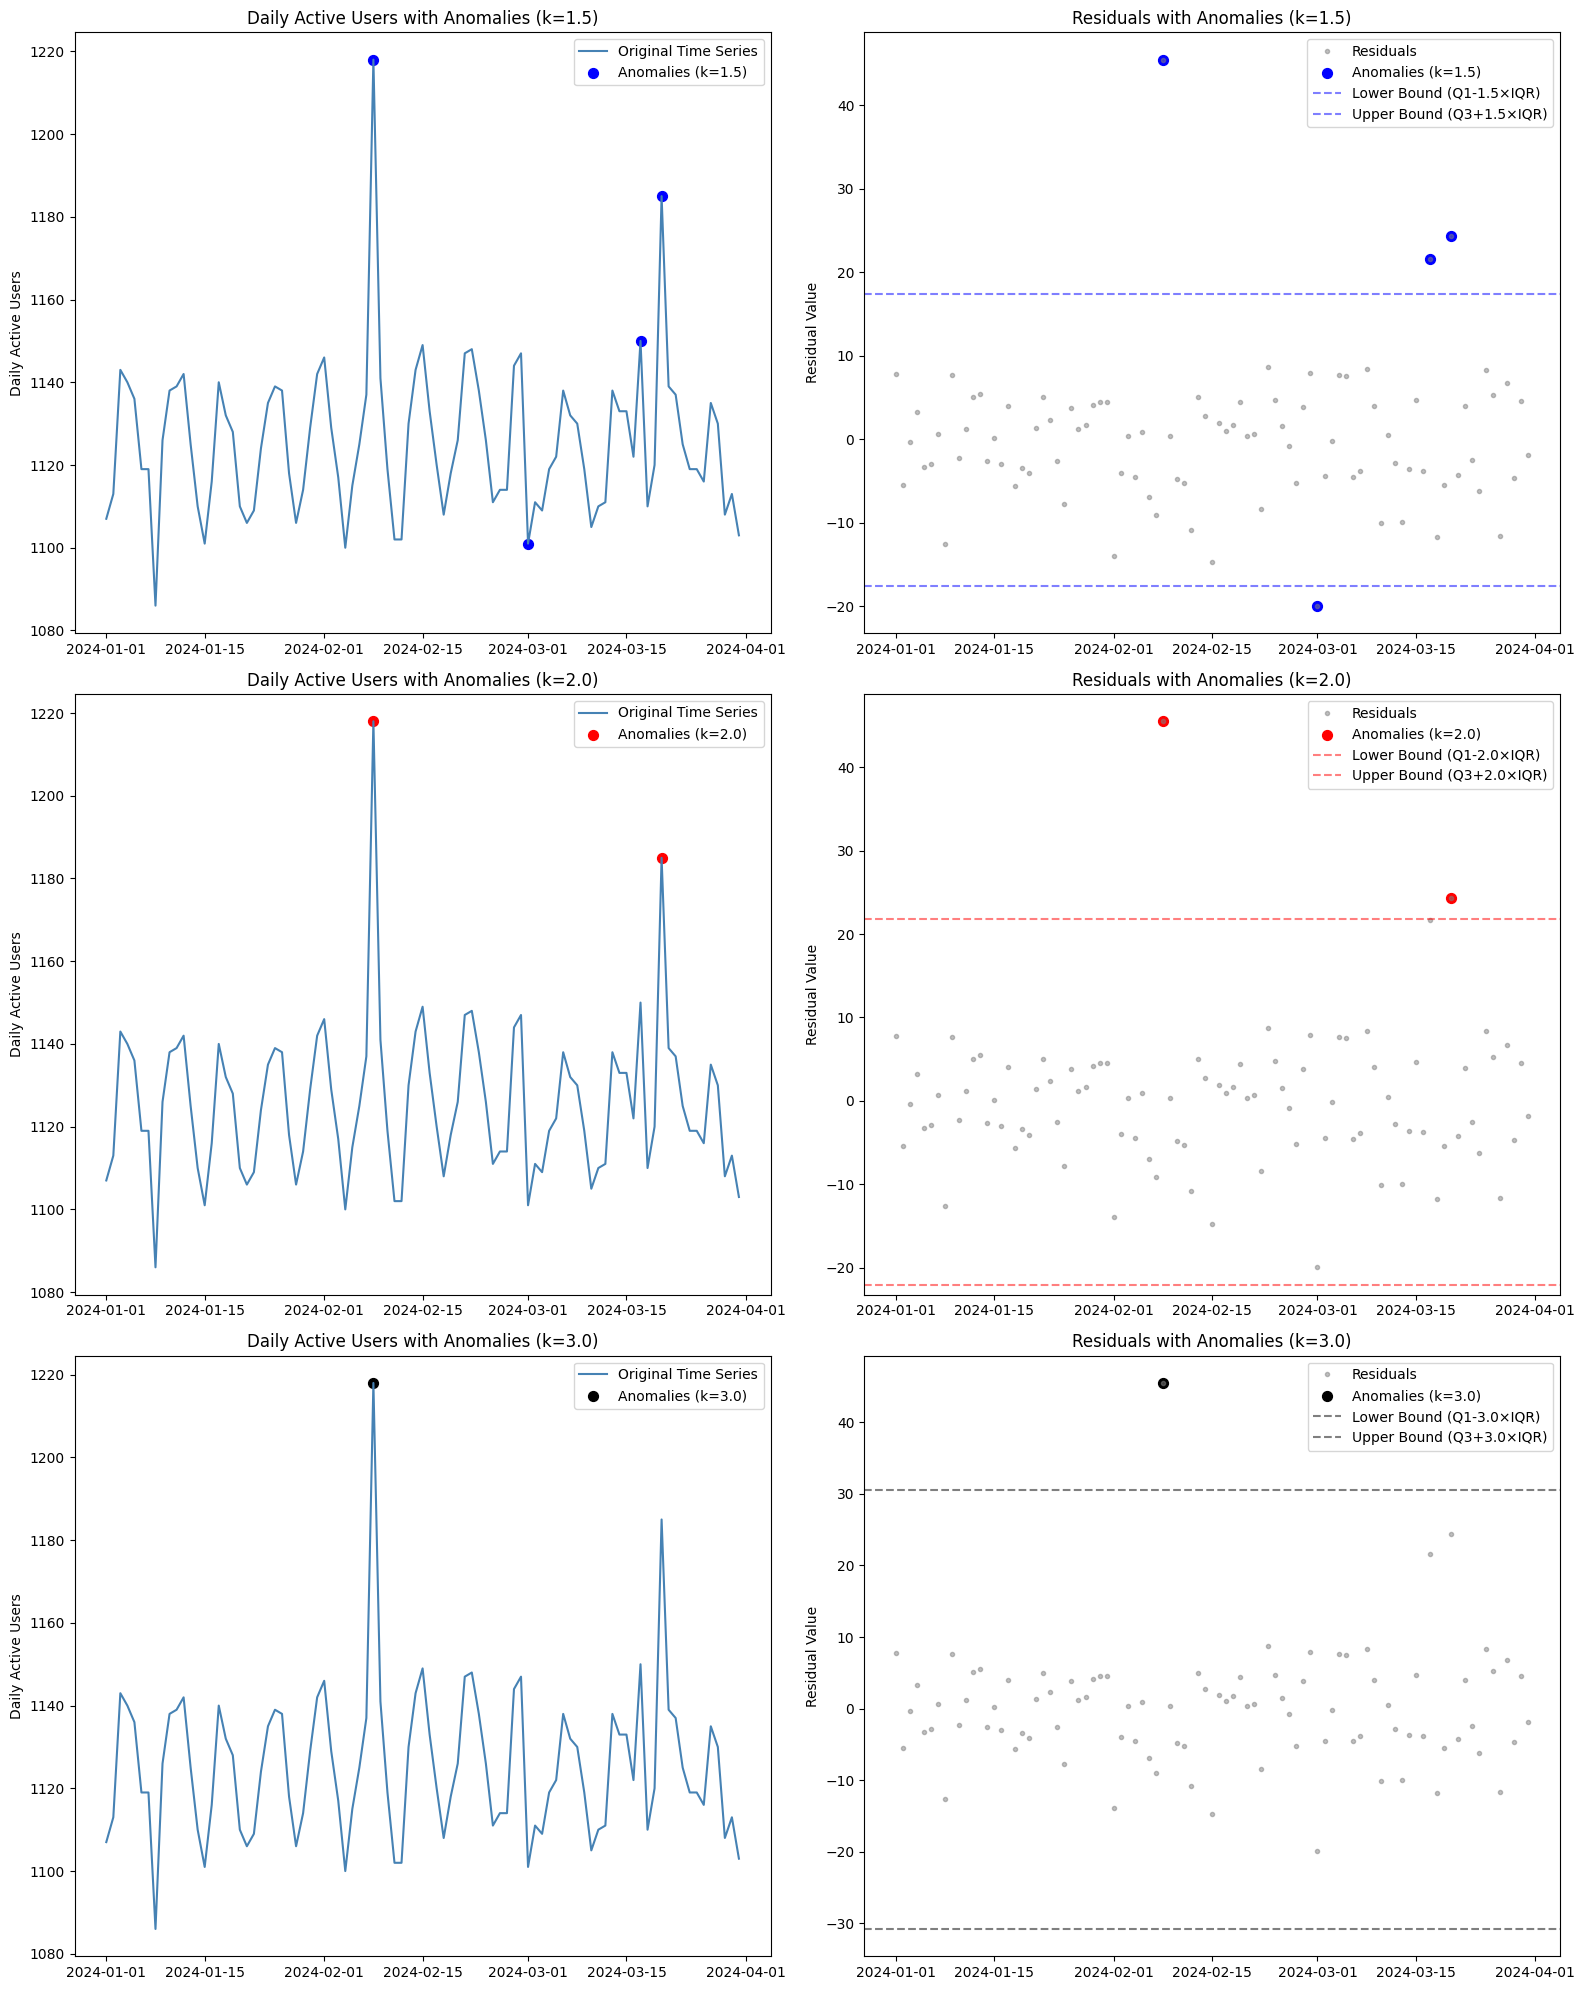

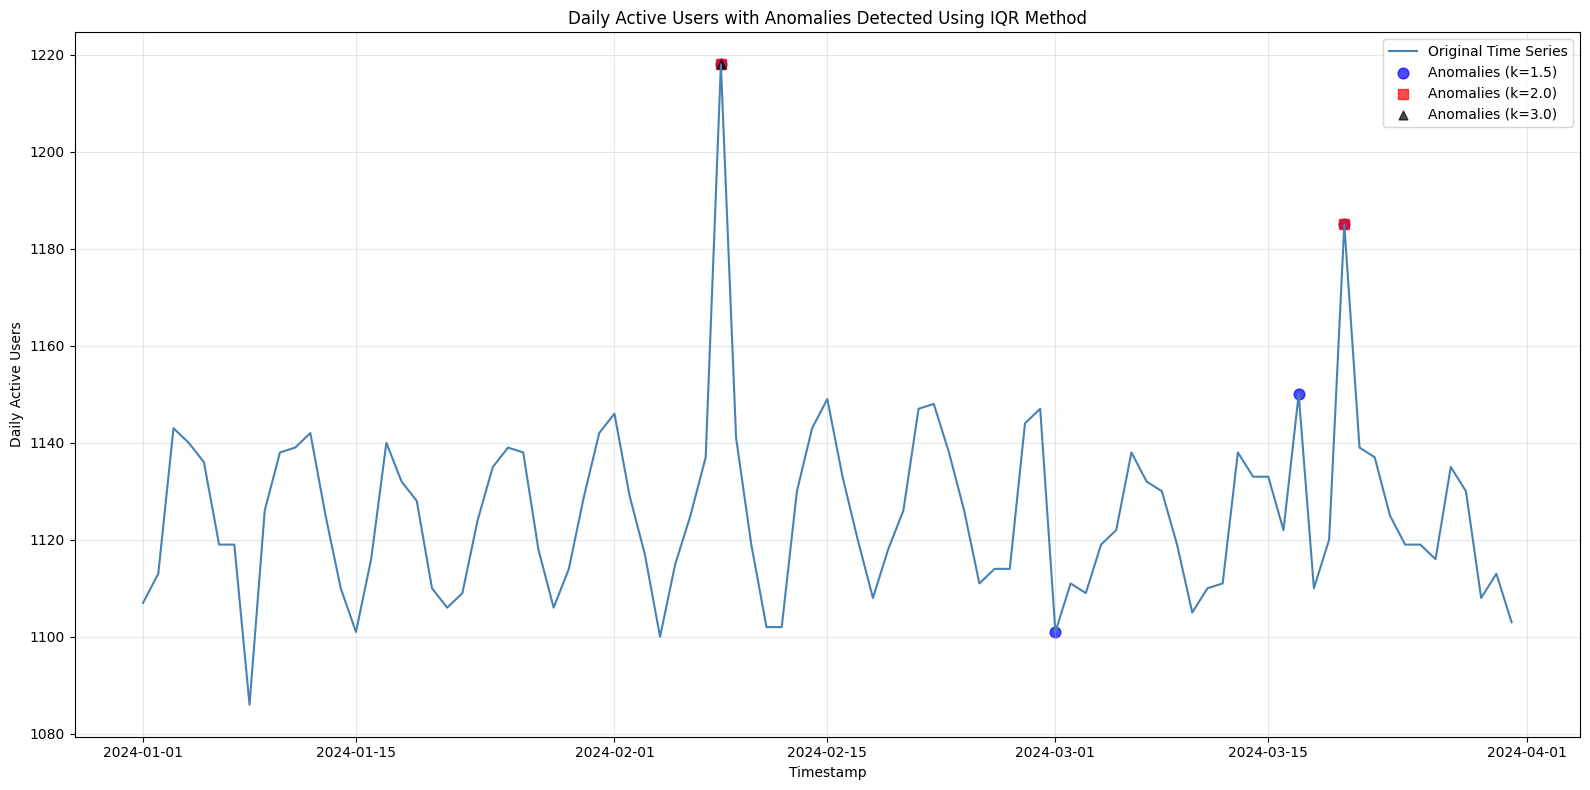

In [27]:
#
#
# Your code to plot the anomalies for three different k values.
# Plot original series as well as residuals.
# Define k values to use
k_values = [1.5, 2.0, 3.0]
colors = ['blue', 'red', 'black']
labels = ['Mild Anomalies (k=1.5)', 'Moderate Anomalies (k=2.0)', 'Severe Anomalies (k=3.0)']

# Create figure with 2 subplots (original series and residuals)
fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Plot original time series in the top subplot
axes[0].plot(dau, label='Original Time Series', color='steelblue')
axes[0].set_title('Daily Active Users with Detected Anomalies')
axes[0].set_ylabel('Daily Active Users')

# Plot residuals in the bottom subplot
axes[1].plot(res.resid, marker='.', linestyle='none', color='gray', alpha=0.5, label='Residuals')
axes[1].set_title('Residuals with Detected Anomalies')
axes[1].set_xlabel('Timestamp')
axes[1].set_ylabel('Residual Value')

# Detect and plot anomalies for each k value
for i, k in enumerate(k_values):
    # Calculate quartiles and IQR
    Q1 = np.nanpercentile(res.resid, 25)
    Q3 = np.nanpercentile(res.resid, 75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Identify anomalies in residuals
    anomalies = np.where((res.resid < lower_bound) | (res.resid > upper_bound), res.resid, np.nan)

    # Convert to pandas Series to preserve timestamps
    anomaly_series = pd.Series(anomalies, index=res.resid.index)

    # Get dates where anomalies were detected
    anomaly_dates = anomaly_series.dropna().index

    # Get original values for these dates
    anomaly_values = dau.loc[anomaly_dates]

    # Plot anomalies on original series
    axes[0].scatter(anomaly_dates, anomaly_values,
                   color=colors[i], s=50, label=labels[i])

    # Plot anomalies on residuals
    axes[1].scatter(anomaly_dates, anomaly_series.dropna(),
                   color=colors[i], s=50, label=labels[i])

    # Plot bounds on residuals plot
    axes[1].axhline(y=lower_bound, color=colors[i], linestyle='--', alpha=0.5,
                   label=f'Bounds (k={k})')
    axes[1].axhline(y=upper_bound, color=colors[i], linestyle='--', alpha=0.5)

# Add legends
axes[0].legend()
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Alternative: Create separate plots for each k value
plt.figure(figsize=(16, 20))

for i, k in enumerate(k_values):
    # Calculate quartiles and IQR
    Q1 = np.nanpercentile(res.resid, 25)
    Q3 = np.nanpercentile(res.resid, 75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Identify anomalies in residuals
    anomalies = np.where((res.resid < lower_bound) | (res.resid > upper_bound), res.resid, np.nan)

    # Convert to pandas Series to preserve timestamps
    anomaly_series = pd.Series(anomalies, index=res.resid.index)

    # Get dates where anomalies were detected
    anomaly_dates = anomaly_series.dropna().index

    # Get original values for these dates
    anomaly_values = dau.loc[anomaly_dates]

    # Create subplots for this k value
    plt.subplot(3, 2, 2*i+1)
    plt.plot(dau, label='Original Time Series', color='steelblue')
    plt.scatter(anomaly_dates, anomaly_values,
               color=colors[i], s=50, label=f'Anomalies (k={k})')
    plt.title(f'Daily Active Users with Anomalies (k={k})')
    plt.ylabel('Daily Active Users')
    plt.legend()

    plt.subplot(3, 2, 2*i+2)
    plt.plot(res.resid, marker='.', linestyle='none', color='gray', alpha=0.5, label='Residuals')
    plt.scatter(anomaly_dates, anomaly_series.dropna(),
               color=colors[i], s=50, label=f'Anomalies (k={k})')
    plt.axhline(y=lower_bound, color=colors[i], linestyle='--', alpha=0.5,
               label=f'Lower Bound (Q1-{k}×IQR)')
    plt.axhline(y=upper_bound, color=colors[i], linestyle='--', alpha=0.5,
               label=f'Upper Bound (Q3+{k}×IQR)')
    plt.title(f'Residuals with Anomalies (k={k})')
    plt.ylabel('Residual Value')
    plt.legend()

plt.tight_layout()
plt.show()

# Create a single unified visualization with all k values on the original time series
plt.figure(figsize=(16, 8))

# Plot original time series
plt.plot(dau, label='Original Time Series', color='steelblue')

# Add markers for anomalies with different k values
marker_styles = ['o', 's', '^']  # Different marker shapes for different k values
marker_sizes = [60, 50, 40]      # Different sizes for different k values

for i, k in enumerate(k_values):
    # Calculate quartiles and IQR
    Q1 = np.nanpercentile(res.resid, 25)
    Q3 = np.nanpercentile(res.resid, 75)
    IQR = Q3 - Q1

    # Calculate bounds
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Identify anomalies in residuals
    anomalies = np.where((res.resid < lower_bound) | (res.resid > upper_bound), res.resid, np.nan)

    # Convert to pandas Series to preserve timestamps
    anomaly_series = pd.Series(anomalies, index=res.resid.index)

    # Get dates where anomalies were detected
    anomaly_dates = anomaly_series.dropna().index
    anomaly_values = dau.loc[anomaly_dates]

    # Plot anomalies on original series
    plt.scatter(anomaly_dates, anomaly_values,
               color=colors[i], s=marker_sizes[i], marker=marker_styles[i],
               label=f'Anomalies (k={k})', alpha=0.7)

plt.title('Daily Active Users with Anomalies Detected Using IQR Method')
plt.xlabel('Timestamp')
plt.ylabel('Daily Active Users')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Folooing section is optional for this lab.

The code below uses Linear Regression. Based on the following code write your own code to detect anomalies in using ARIMA which is also one of the regression algorithm.

ARIMA is a model used to predict future value in a time series.
It looks at past data to find patterns and trends.

AR (AutoRegressive): Uses past values to predict future ones.
I (Integrated): Makes the data more stable by removing trends.
MA (Moving Average): Uses past errors (differences between actual and predicted values) to improve predictions.

You can use the Python library statsmodels.tsa.arima.model to implement ARIMA.
https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html

You need to compare the ARIMA prediction and actual values and if they are significantly different then the points can be considered as anomolous.







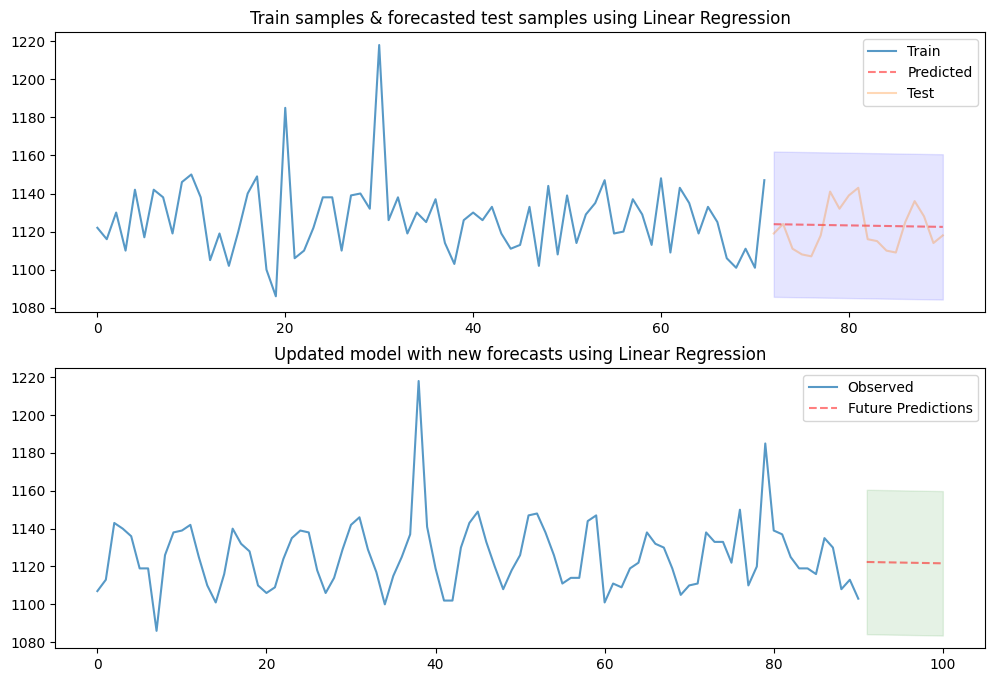

MSE for Linear Regression Forecast: 133.6046


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Splitting data into train and test
train, test = train_test_split(dau.values, train_size=0.8, random_state=42)

# Creating time indices as features for regression
train_indices = np.arange(len(train)).reshape(-1, 1)
test_indices = np.arange(len(train), len(train) + len(test)).reshape(-1, 1)

# Training linear regression model
model = LinearRegression()
model.fit(train_indices, train)

# Making predictions
preds = model.predict(test_indices)

# Calculating confidence intervals (assuming normal distribution of residuals)
residuals = train - model.predict(train_indices)
std_dev = np.std(residuals)
conf_int = np.column_stack((preds - 1.96 * std_dev, preds + 1.96 * std_dev))

# Plotting results
fig, axes = plt.subplots(2, 1, figsize=(12, 8))
x_axis = np.arange(len(train) + len(test))
axes[0].plot(x_axis[:len(train)], train, alpha=0.75, label="Train")
axes[0].plot(x_axis[len(train):], preds, alpha=0.5, linestyle='--', color='r', label="Predicted")
axes[0].plot(x_axis[len(train):], test, alpha=0.3, label="Test")
axes[0].fill_between(x_axis[len(train):], conf_int[:, 0], conf_int[:, 1], alpha=0.1, color='b')
axes[0].set_title("Train samples & forecasted test samples using Linear Regression")
axes[0].legend()

# Detecting anomalies
anomalies = (test < conf_int[:, 0]) | (test > conf_int[:, 1])
axes[0].scatter(x_axis[len(train):][anomalies], test[anomalies], color='red', label="Anomalies")

# Updating model with test data and predicting future values
new_indices = np.arange(len(dau.values), len(dau.values) + 10).reshape(-1, 1)
new_preds = model.predict(new_indices)
new_conf_int = np.column_stack((new_preds - 1.96 * std_dev, new_preds + 1.96 * std_dev))

axes[1].plot(np.arange(len(dau.values)), dau, alpha=0.75, label="Observed")
axes[1].plot(new_indices, new_preds, alpha=0.5, linestyle='--', color='r', label="Future Predictions")
axes[1].fill_between(new_indices.flatten(), new_conf_int[:, 0], new_conf_int[:, 1], alpha=0.1, color='g')
axes[1].set_title("Updated model with new forecasts using Linear Regression")
axes[1].legend()
plt.show()

# Compute MSE
mse_linear = mean_squared_error(test, preds)
print(f"MSE for Linear Regression Forecast: {mse_linear:.4f}")